In [18]:
import os
import sys
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, '..', '..', '..'))
sys.path.append(parent_dir)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Valid data

In [20]:
data = pd.read_csv(parent_dir + '/method/SDD_FIQA/scores/valid/facenet_LFW.csv')

In [21]:
data

,img_path,output_score
0,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0001.jpg,49.083691
1,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0002.jpg,36.365246
2,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0003.jpg,33.593166
3,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0004.jpg,37.177097
4,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0005.jpg,34.054207
...,...,...
5980,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,30.361603
5981,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,46.988930
5982,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,38.457775
5983,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,30.729536


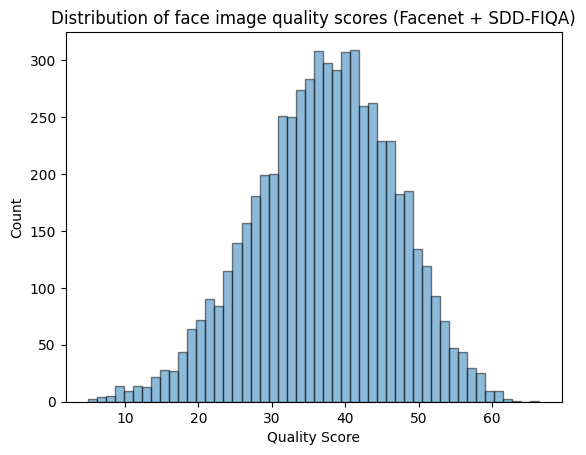

In [22]:
plt.hist(data['output_score'], bins=50, edgecolor='black', alpha=0.5)
plt.title("Distribution of face image quality scores (Facenet + SDD-FIQA)")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.show()

In [23]:
under_5 = data[data['output_score'] < 5].sample(1)
bet_5_15 = data[(data['output_score'] >= 5) & (data['output_score'] < 15)].sample(1)
bet_15_30 = data[(data['output_score'] >= 15) & (data['output_score'] < 30)].sample(1)
bet_30_45 = data[(data['output_score'] >= 30) & (data['output_score'] < 45)].sample(1)
bet_45_60 = data[(data['output_score'] >= 45) & (data['output_score'] < 60)].sample(1)
bet_60_75 = data[(data['output_score'] >= 60) & (data['output_score'] < 90)].sample(1)

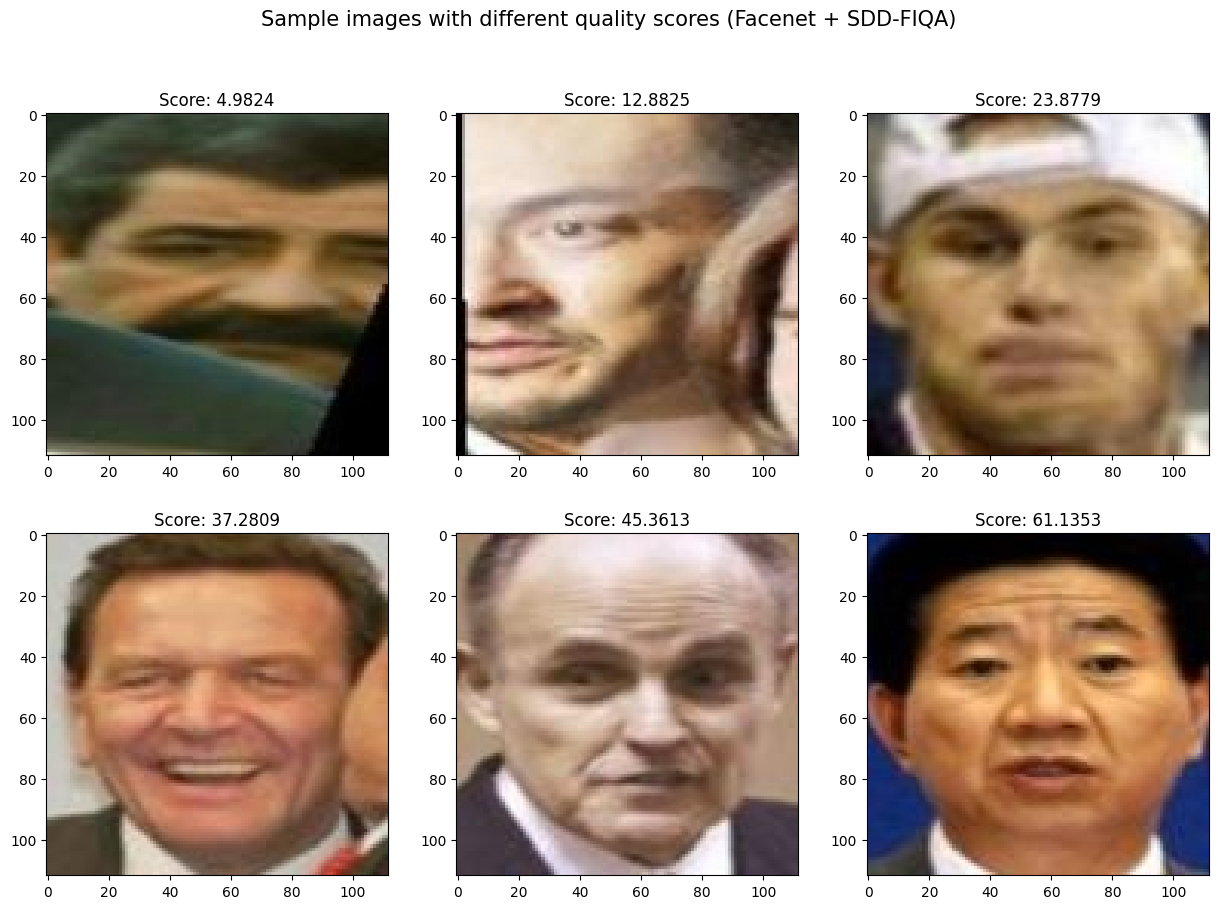

In [24]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
img = plt.imread(parent_dir + "/" + under_5['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(round(under_5['output_score'].values[0], 4)))

plt.subplot(2, 3, 2)
img = plt.imread(parent_dir + "/" + bet_5_15['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(round(bet_5_15['output_score'].values[0], 4)))

plt.subplot(2, 3, 3)
img = plt.imread(parent_dir + "/" + (bet_15_30['img_path'].values[0]))
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(round(bet_15_30['output_score'].values[0], 4)))

plt.subplot(2, 3, 4)
img = plt.imread(parent_dir + "/" + bet_30_45['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(round(bet_30_45['output_score'].values[0], 4)))

plt.subplot(2, 3, 5)
img = plt.imread(parent_dir + "/" + bet_45_60['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(round(bet_45_60['output_score'].values[0], 4)))

plt.subplot(2, 3, 6)
img = plt.imread(parent_dir + "/" + bet_60_75['img_path'].values[0])
plt.imshow(img[..., ::-1])
plt.title('Score: ' + str(round(bet_60_75['output_score'].values[0], 4)))

plt.suptitle('Sample images with different quality scores (Facenet + SDD-FIQA)', fontsize=15)
plt.show()



In [25]:
thresholds = np.linspace(10, 55, 66)

In [26]:
valid_emb = pd.read_csv(parent_dir + '/mgr_data/embeddings/facenet_LFW_embeddings.csv')
valid_emb["path"] = valid_emb["path"].str.replace("/", "\\", regex=False)

In [27]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from face_models.model import load_model
import ast

In [28]:
model = load_model("facenet")

d:\mgr\wvenv\Lib\site-packages\facenet_pytorch\models\inception_resnet_v1.py:329: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(cached_file)


In [29]:
fars = []
frrs = []
accs = []
f1s = []
precs = []
recs = []


In [30]:
from tqdm import tqdm

In [31]:
data

,img_path,output_score
0,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0001.jpg,49.083691
1,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0002.jpg,36.365246
2,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0003.jpg,33.593166
3,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0004.jpg,37.177097
4,mgr_data\LFW\Abdullah_Gul\Abdullah_Gul_0005.jpg,34.054207
...,...,...
5980,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,30.361603
5981,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,46.988930
5982,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,38.457775
5983,mgr_data\LFW\Zinedine_Zidane\Zinedine_Zidane_0...,30.729536


In [32]:
valid_emb

,embedding,label,path
0,"[0.06855650991201401, -0.08026910573244095, -0...",261,mgr_data\LFW\Michael_Bloomberg\Michael_Bloombe...
1,"[0.0805143192410469, -0.026211567223072052, 0....",95,mgr_data\LFW\Donald_Rumsfeld\Donald_Rumsfeld_0...
2,"[-0.016165627166628838, 0.08490537852048874, 0...",321,mgr_data\LFW\Renee_Zellweger\Renee_Zellweger_0...
3,"[0.004639521706849337, 0.04204564914107323, 0....",348,mgr_data\LFW\Saddam_Hussein\Saddam_Hussein_001...
4,"[0.07679511606693268, 0.039205554872751236, 0....",348,mgr_data\LFW\Saddam_Hussein\Saddam_Hussein_001...
...,...,...,...
5980,"[0.012522137723863125, -0.03137009218335152, 0...",289,mgr_data\LFW\Nestor_Kirchner\Nestor_Kirchner_0...
5981,"[-0.042407676577568054, 0.045319996774196625, ...",168,mgr_data\LFW\Jean_Chretien\Jean_Chretien_0031.jpg
5982,"[-0.03898127004504204, 0.010881548747420311, 0...",171,mgr_data\LFW\Jennifer_Aniston\Jennifer_Aniston...
5983,"[0.01751886121928692, 0.0643644630908966, 0.01...",232,mgr_data\LFW\Li_Peng\Li_Peng_0005.jpg


In [33]:
num_data = len(data)
data_percent = []

In [34]:
for t in tqdm(thresholds):
    choices = data[data['output_score'] > t]
    data_percent.append(1- (len(choices) / num_data))
    embeddings = valid_emb[valid_emb['path'].isin(choices['img_path'])]
    labels = embeddings['label'].values
    emb = embeddings['embedding'].values
    emb = np.array([np.array(ast.literal_eval(e)) for e in emb])
    
    score = model.compute_similarities(emb, emb)

    labels_matrix = np.equal(labels[:, None], labels)
    upper_triangle_indices = np.triu_indices_from(score, k=1)
    class_labels = labels_matrix[upper_triangle_indices]
    scores = score[upper_triangle_indices]

    ground_truth = class_labels
    decisions = scores < 1.078104
    acc = accuracy_score(ground_truth, decisions)
    f1 = f1_score(ground_truth, decisions)
    prec = precision_score(ground_truth, decisions)
    rec = recall_score(ground_truth, decisions)
    FP = np.sum((ground_truth == 0) & (decisions == 1))
    FN = np.sum((ground_truth == 1) & (decisions == 0))
    TP = np.sum((ground_truth == 1) & (decisions == 1))
    TN = np.sum((ground_truth == 0) & (decisions == 0))
    FAR = FP / (FP + TN)
    FRR = FN / (FN + TP)
    fars.append(FAR)
    frrs.append(FRR)
    accs.append(acc)
    f1s.append(f1)
    precs.append(prec)
    recs.append(rec)

100%|██████████| 66/66 [12:32<00:00, 11.40s/it]


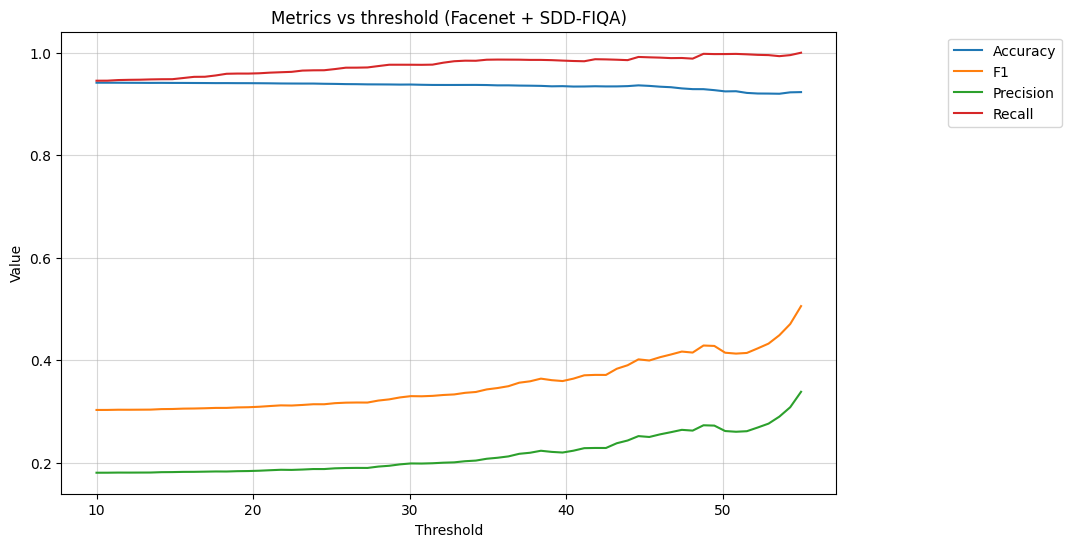

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accs, label='Accuracy')
plt.plot(thresholds, f1s, label='F1')
plt.plot(thresholds, precs, label='Precision')
plt.plot(thresholds, recs, label='Recall')
# plt.axvline(x=0.24, color='r', linestyle='--', label='Threshold = 0.24')
plt.title('Metrics vs threshold (Facenet + SDD-FIQA)')
plt.xlabel('Threshold')
plt.ylabel('Value')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(alpha=0.5)

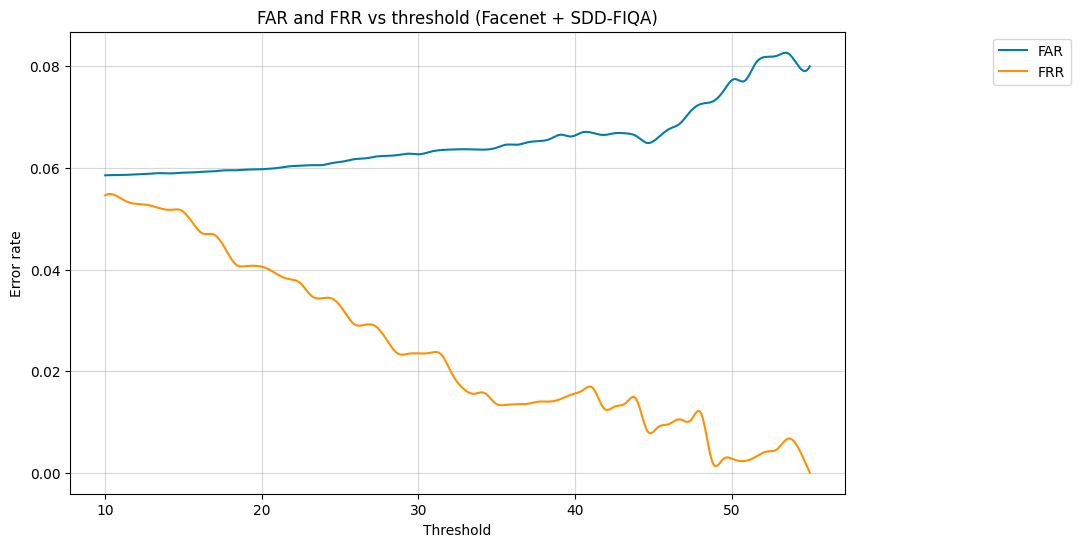

In [36]:
from scipy.interpolate import make_interp_spline
new_fars = make_interp_spline(thresholds, fars)
X_ = np.linspace(np.min(thresholds), np.max(thresholds), 500)
Y_ = new_fars(X_)
plt.figure(figsize=(10, 6))
plt.plot(X_, Y_, label='FAR', color='#007EA7')

new_frrs = make_interp_spline(thresholds, frrs)
Y_ = new_frrs(X_)
plt.plot(X_, Y_, label='FRR', color= '#FF9000')
plt.title('FAR and FRR vs threshold (Facenet + SDD-FIQA)')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.grid(alpha=0.5)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
# plt.figure(figsize=(10, 6))
# plt.plot(thresholds, fars, label='FAR')
# plt.plot(thresholds, frrs, label='FRR')
# plt.title('adaface - FAR and FRR vs threshold')
# plt.xlabel('Threshold')
# plt.ylabel('Error rate')
# plt.grid(alpha=0.5)
# plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))

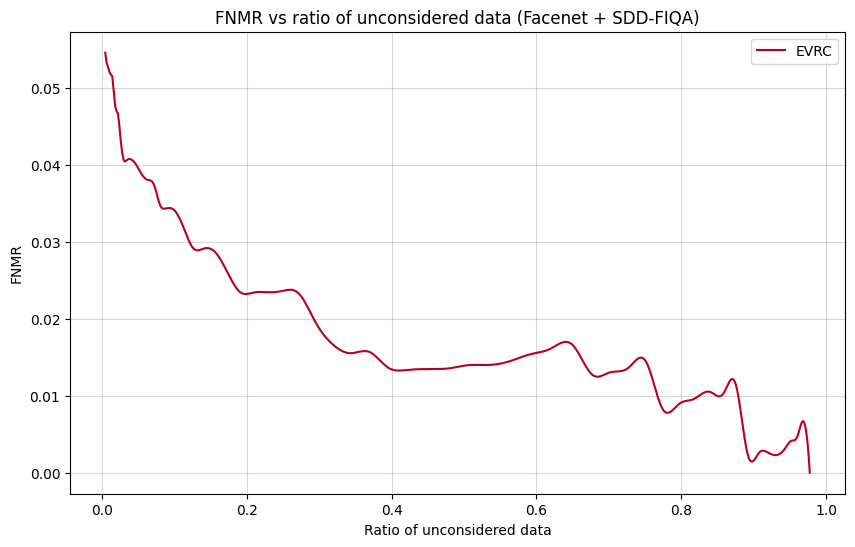

In [37]:
new_evrc = make_interp_spline(data_percent, frrs)
X_ = np.linspace(np.min(data_percent), np.max(data_percent), 500)
Y_ = new_evrc(X_)
plt.figure(figsize=(10, 6))
plt.plot(X_, Y_, color ='#B80022', label='EVRC')
plt.title('FNMR vs ratio of unconsidered data (Facenet + SDD-FIQA)')
plt.xlabel('Ratio of unconsidered data')
plt.ylabel('FNMR')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1))
plt.grid(alpha=0.5)


In [38]:
from sklearn.metrics import auc
auc_value = auc(data_percent, frrs)
print(auc_value)

0.017200601671215707


In [39]:
import pickle
evrc = np.stack((X_, Y_))

with open(parent_dir + '/notebooks/quality/connected/sddfiqa_facenet_evrc.pkl', 'wb') as f:
    pickle.dump(evrc, f)


# Test data

In [40]:
test_emb = pd.read_csv(parent_dir + '/mgr_data/embeddings/facenet_IJBC_cut_embeddings.csv')
test_data = pd.read_csv(parent_dir + '/method/SDD_FIQA/scores/test/facenet_IJBC.csv')
test_emb["path"] = test_emb["path"].str.replace("/", "\\", regex=False)

In [41]:
choices = test_data[test_data['output_score'] > 30]
embeddings = test_emb[test_emb['path'].isin(choices['img_path'])]
labels = embeddings['label'].values
emb = embeddings['embedding'].values
emb = np.array([np.array(ast.literal_eval(e)) for e in emb])

score = model.compute_similarities(emb, emb)

labels_matrix = np.equal(labels[:, None], labels)
upper_triangle_indices = np.triu_indices_from(score, k=1)
class_labels = labels_matrix[upper_triangle_indices]
scores = score[upper_triangle_indices]

ground_truth = class_labels
decisions = scores < 1.078104
acc = accuracy_score(ground_truth, decisions)
f1 = f1_score(ground_truth, decisions)
prec = precision_score(ground_truth, decisions)
rec = recall_score(ground_truth, decisions)
FP = np.sum((ground_truth == 0) & (decisions == 1))
FN = np.sum((ground_truth == 1) & (decisions == 0))
TP = np.sum((ground_truth == 1) & (decisions == 1))
TN = np.sum((ground_truth == 0) & (decisions == 0))
FAR = FP / (FP + TN)
FRR = FN / (FN + TP)

In [42]:
thresholds = np.linspace(0.2, 1.8, 161)

In [43]:
fars = []
frrs = []

In [44]:
choices = test_data[test_data['output_score'] > 30]
for t in thresholds:
    embeddings = test_emb[test_emb['path'].isin(choices['img_path'])]
    labels = embeddings['label'].values
    emb = embeddings['embedding'].values
    emb = np.array([np.array(ast.literal_eval(e)) for e in emb])

    score = model.compute_similarities(emb, emb)

    labels_matrix = np.equal(labels[:, None], labels)
    upper_triangle_indices = np.triu_indices_from(score, k=1)
    class_labels = labels_matrix[upper_triangle_indices]
    scores = score[upper_triangle_indices]

    ground_truth = class_labels
    decisions = scores < t
    FP = np.sum((ground_truth == 0) & (decisions == 1))
    FN = np.sum((ground_truth == 1) & (decisions == 0))
    TP = np.sum((ground_truth == 1) & (decisions == 1))
    TN = np.sum((ground_truth == 0) & (decisions == 0))
    far = FP / (FP + TN)
    frr = FN / (FN + TP)
    fars.append(far)
    frrs.append(FRR)

In [45]:
from utils.utils import calculate_eer
thres, eer = calculate_eer(thresholds, fars, frrs)

In [46]:
results_json = {}
results_json['valid'] = {}
results_json['test'] = {}
results_json['valid']['auc'] = auc_value
results_json['test']['acc'] = acc
results_json['test']['f1'] = f1
results_json['test']['prec'] = prec
results_json['test']['rec'] = rec
results_json['test']['FAR'] = FAR
results_json['test']['FRR'] = FRR
results_json['test']['eer'] = eer


In [47]:
results_json

{'valid': {'auc': 0.017200601671215707},
 'test': {'acc': 0.8835054931353126,
  'f1': 0.10298791031895295,
  'prec': 0.054405491155205155,
  'rec': 0.9622254116333772,
  'FAR': 0.11704544154563923,
  'FRR': 0.03777458836662281,
  'eer': 0.03777458836661818}}

In [48]:
import json
with open(parent_dir + '/mgr_data/quality_results/sddfiqa_facenet_results.json', 'w') as f:
    json.dump(results_json, f, indent=4)

In [49]:
print(f"""
Accuracy: {acc}
F1: {f1}
Precision: {prec}
Recall: {rec}
FAR: {FAR}
FRR: {FRR}
      """)


Accuracy: 0.8835054931353126
F1: 0.10298791031895295
Precision: 0.054405491155205155
Recall: 0.9622254116333772
FAR: 0.11704544154563923
FRR: 0.03777458836662281
      
